In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import rubin_sim.maf.db as db
import rubin_sim.maf.utils as utils
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.stackers as stackers
import rubin_sim.maf.metricBundles as metricBundles
import pandas as pd
from scipy import interpolate

In [2]:
#runName = 'carina_v1.7_10yrs'
#conn = 'carina_v1.7_10yrs.db'
# Check that new db works as well
runName = 'baseline_v2.1_10yrs'
conn = 'baseline_v2.1_10yrs.db'

#conn = db.OpsimDatabase(dbFile)
# Set the output directory
outDir = 'temp'
resultsDb = db.ResultsDb(outDir)

In [3]:
bundleList = []

# Grab everything
sql = ''

ra = np.array([ 160.])
dec = np.array([ -60.])
# Look at just one point on the sky
slicer = slicers.UserPointsSlicer(ra, dec)
# Pull out this information for visits that overlap that point
metric = metrics.PassMetric(cols=['observationStartMJD', 'fiveSigmaDepth', 'filter', 'note'])
plotDict={}
summaryStats = []
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                             plotDict=plotDict,
                                             summaryMetrics=summaryStats))
bg = metricBundles.MetricBundleGroup(bundleList, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()


Querying table None with no constraint for columns ['observationStartMJD', 'fieldRA', 'fieldDec', 'note', 'rotSkyPos', 'filter', 'fiveSigmaDepth'].
Found 2081749 visits
Running:  ['opsim_Pass_observationStartMJD_fiveSigmaDepth_filter_note_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


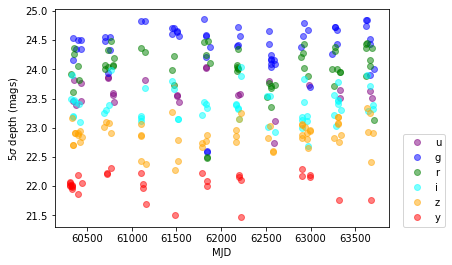

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
mv = bundleList[0].metricValues[0]
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}

for fn in f2c:
    in_filt = np.where(mv['filter'] == fn)[0]
    ax1.plot(mv['observationStartMJD'][in_filt],
             mv['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn], label=fn, alpha=0.5)
ax1.set_xlabel('MJD')
ax1.set_ylabel(r'5$\sigma$ depth (mags)')
ax1.legend(loc=(1.04,0))

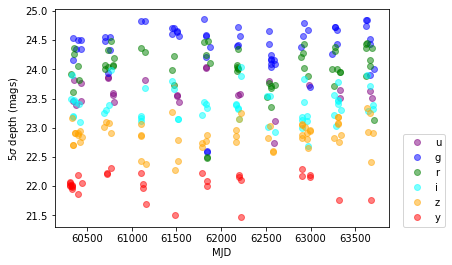

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
mv = bundleList[0].metricValues[0]
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}

for fn in f2c:
    in_filt = np.where(mv['filter'] == fn)[0]
    ax1.plot(mv['observationStartMJD'][in_filt],
             mv['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn], label=fn, alpha=0.5)
ax1.set_xlabel('MJD')
ax1.set_ylabel(r'5$\sigma$ depth (mags)')
ax1.legend(loc=(1.04,0))
#ax1.set_xlim([59990, 60000])

In [6]:
# here's what the data looks like
mv

rec.array([(62901.32463924, 162.05895485, -59.74517269, 'blob, yy, a', -1.08390466e+01, 'y', 22.18021106),
           (62558.08829861, 163.09953004, -59.62610923, 'blob, gr, a',  1.89956958e+01, 'r', 23.68067497),
           (60745.13596672, 161.94801148, -59.97015984, 'blob, iz, b',  1.04291765e+02, 'i', 23.38805206),
           (60745.11160429, 161.94801148, -59.97015984, 'blob, iz, a', -2.41222193e+02, 'z', 23.08484967),
           (62170.35399218, 163.08877026, -60.17846132, 'blob, iz, b',  2.05384176e+01, 'z', 22.86239348),
           (60307.29420656, 163.16256709, -60.62561617, 'blob, yy, a', -3.06048452e+02, 'y', 22.04697861),
           (62558.14021695, 163.09953004, -59.62610923, 'blob, gr, a',  1.15056851e+00, 'g', 24.16508097),
           (60796.99626162, 162.6724001 , -60.17441103, 'blob, ur, a',  8.04814861e+00, 'u', 23.43324748),
           (63333.00248971, 162.8953283 , -58.74736955, 'blob, ur, a', -2.81858716e+02, 'r', 23.95468083),
           (60788.02677986, 163.38928

In [7]:
# dates of observations
mv.sort(order='observationStartMJD')
mv['observationStartMJD']

array([60307.29374874, 60307.29420656, 60307.31262114, 60307.31307897,
       60319.34724734, 60319.36116655, 60330.23989517, 60330.26485059,
       60336.24490189, 60336.24536396, 60336.26806148, 60336.26852356,
       60338.31668548, 60338.31715511, 60338.33707423, 60338.33754385,
       60344.19047812, 60344.21489375, 60348.31435824, 60348.33550813,
       60351.19005993, 60351.21400522, 60354.17640732, 60354.20072479,
       60360.14335686, 60360.16823412, 60360.16869858, 60375.1107361 ,
       60375.13350365, 60398.10935534, 60398.10980836, 60398.1343125 ,
       60398.13476552, 60399.00642017, 60399.03082797, 60408.14296184,
       60408.16712839, 60417.14222504, 60420.04027028, 60420.06483083,
       60433.98398316, 60434.00702148, 60437.08156628, 60437.10615535,
       60447.98908097, 60448.01359232, 60690.28866144, 60690.31361488,
       60705.14656036, 60705.14700946, 60705.17165858, 60705.17210801,
       60717.22312642, 60717.2477125 , 60719.18427164, 60719.20764092,
      

In [8]:
# Let's read in the light curve
names = ['HJD', 'mag', 'band']
types = [float, float, "|U1"]
dtype = list(zip(names, types))
lc_data =np.genfromtxt('source0603396438_whole_CoRoT_LC_NEW_sampled.dat', dtype=dtype)

Text(0.5, 1.0, 'input lc')

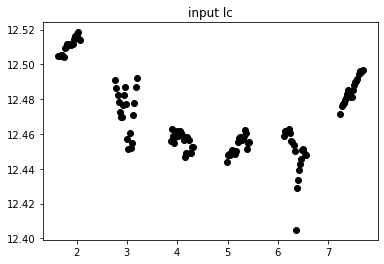

In [9]:
plt.plot(lc_data['HJD'], lc_data['mag'], 'ko')
plt.title('input lc')

In [10]:
in_filt = np.where(mv['filter'] == 'r')
mv['observationStartMJD'][in_filt]

array([60319.36116655, 60344.21489375, 60351.21400522, 60354.17640732,
       60399.03082797, 60408.14296184, 60705.17165858, 60705.17210801,
       60731.17807408, 60738.25838273, 60767.11884653, 60788.02677986,
       60788.02724121, 60797.020542  , 61108.05706364, 61143.17819521,
       61446.30037097, 61469.22877229, 61471.17365604, 61805.30156683,
       61826.23872988, 61844.05313286, 61844.05358281, 61852.16446196,
       61875.06096301, 62174.34086948, 62175.28916935, 62177.29249048,
       62184.20651263, 62185.2653189 , 62185.26622995, 62509.36109185,
       62532.34800055, 62558.08829861, 62558.08919535, 62562.04463265,
       62598.17266504, 62894.29822596, 62913.16953848, 62922.14433987,
       62924.21192072, 62967.03678399, 63244.26518155, 63264.32197225,
       63273.27625906, 63273.27717682, 63297.13671734, 63333.00248971,
       63333.00294088, 63621.16398747, 63623.18321471, 63623.25553581,
       63632.30369074, 63658.05867283, 63661.14777091, 63691.03573981,
      

Text(0, 0.5, 'Interpolated mags')

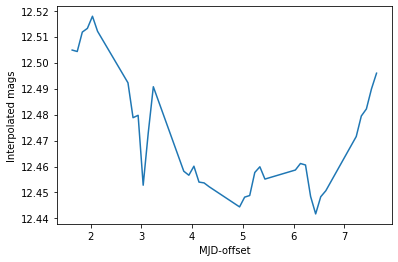

In [11]:
interp = interpolate.interp1d(lc_data['HJD'], lc_data['mag'], fill_value=np.nan)
t = mv['observationStartMJD'][in_filt]-59991 + lc_data['HJD'].min()
t=t[np.where( (t <= lc_data['HJD'].max()) & (t >= lc_data['HJD'].min()) ) ]
lsst_sampled = interp(t)

plt.plot(t, lsst_sampled, 'ko')

t_filled = np.arange(lc_data['HJD'].min(),lc_data['HJD'].max(), 0.1)
plt.plot(t_filled, interp(t_filled))

plt.xlabel('MJD-offset')
plt.ylabel('Interpolated mags')

In [12]:
# Let's just fold it up
t = mv['observationStartMJD'][in_filt] % (lc_data['HJD'].max()-lc_data['HJD'].min()) 
t += lc_data['HJD'].min()

Text(0, 0.5, 'Interpolated mags')

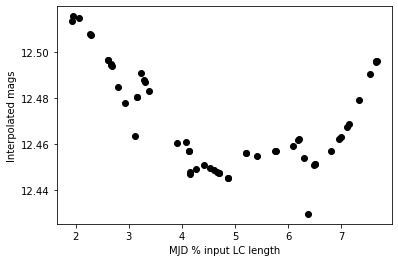

In [13]:
lsst_sampled = interp(t)

plt.plot(t, lsst_sampled, 'ko')
plt.xlabel('MJD % input LC length')
plt.ylabel('Interpolated mags')